In [1]:
# Import library for exploring dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("/content/suicide(1).csv")
df2 = pd.read_csv("/content/suicide(2).csv")


In [3]:
df1.head()

,id,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,1,Albania1987,NaN,"2,156,624,900",796.0,Generation X
1,2,Albania1987,NaN,"2,156,624,900",NaN,Silent
2,3,Albania1987,NaN,"2,156,624,900",796.0,Generation X
3,4,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation
4,5,Albania1987,NaN,"2,156,624,900",796.0,Boomers


In [4]:
df2.head()

,id,country,year,sex,age,suicides_no,population,suicides/100k pop
0,1,Albania,1987.0,male,NaN,21,312900.0,6.71
1,2,Albania,1987.0,male,NaN,16,308000.0,5.19
2,3,Albania,NaN,female,15-24 years,14,289700.0,4.83
3,4,Albania,1987.0,male,75+ years,1,NaN,4.59
4,5,Albania,1987.0,male,25-34 years,9,274300.0,3.28


In [5]:
common_column = 'id'
df = pd.merge(df1, df2, on=common_column)
df.replace(['?', '/', '#'], np.nan, inplace=True)

In [6]:
df.head(10)

,id,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,country,year,sex,age,suicides_no,population,suicides/100k pop
0,1,Albania1987,NaN,"2,156,624,900",796.0,Generation X,Albania,1987.0,male,NaN,21,312900.0,6.71
1,2,Albania1987,NaN,"2,156,624,900",NaN,Silent,Albania,1987.0,male,NaN,16,308000.0,5.19
2,3,Albania1987,NaN,"2,156,624,900",796.0,Generation X,Albania,NaN,female,15-24 years,14,289700.0,4.83
3,4,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation,Albania,1987.0,male,75+ years,1,NaN,4.59
4,5,Albania1987,NaN,"2,156,624,900",796.0,Boomers,Albania,1987.0,male,25-34 years,9,274300.0,3.28
5,6,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation,Albania,1987.0,female,75+ years,1,35600.0,2.81
6,7,Albania1987,NaN,"2,156,624,900",796.0,Silent,Albania,NaN,female,35-54 years,6,278800.0,2.15
7,8,Albania1987,NaN,"2,156,624,900",796.0,Boomers,Albania,1987.0,female,25-34 years,4,NaN,1.56
8,9,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation,Albania,1987.0,male,NaN,1,137500.0,0.73
9,10,Albania1987,NaN,"2,156,624,900",796.0,Generation X,Albania,1987.0,female,5-14 years,0,311000.0,0.00


In [7]:
df.shape

(27820, 13)

In [8]:
df=df.drop('id',axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country-year        27820 non-null  object 
 1   HDI for year        8364 non-null   float64
 2    gdp_for_year ($)   27820 non-null  object 
 3   gdp_per_capita ($)  23820 non-null  float64
 4   generation          27820 non-null  object 
 5   country             27820 non-null  object 
 6   year                22820 non-null  float64
 7   sex                 27820 non-null  object 
 8   age                 23820 non-null  object 
 9   suicides_no         27820 non-null  int64  
 10  population          21201 non-null  object 
 11  suicides/100k pop   27820 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 2.8+ MB


In [10]:
df=df.drop('country-year',axis=1)

In [11]:
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(df.columns)

Index(['HDI_for_year', 'gdp_for_year', 'gdp_per_capita', 'generation',
       'country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop'],
      dtype='object')


In [12]:
df.isnull().sum()

HDI_for_year      19456
gdp_for_year          0
gdp_per_capita     4000
generation            0
country               0
year               5000
sex                   0
age                4000
suicides_no           0
population         6619
suicides_pop          0
dtype: int64

In [13]:
df['age'].value_counts()

75+ years      3995
35-54 years    3977
55-74 years    3974
5-14 years     3965
15-24 years    3964
25-34 years    3945
Name: age, dtype: int64

In [14]:
# Calculate the mode
mode_val = df['age'].mode()[0]

# Fill the null values
df['age'].fillna(mode_val, inplace=True)

In [15]:
df['year'].value_counts()

2001.0    889
2010.0    876
2000.0    867
2011.0    866
2009.0    862
2008.0    845
2006.0    842
2004.0    840
2003.0    835
2007.0    823
2005.0    819
2012.0    817
2002.0    804
1999.0    795
2013.0    787
1998.0    783
1995.0    770
1996.0    753
2014.0    749
1997.0    748
1994.0    680
1991.0    653
1993.0    639
1990.0    637
2015.0    620
1992.0    618
1987.0    532
1989.0    512
1988.0    490
1985.0    481
1986.0    465
2016.0    123
Name: year, dtype: int64

In [16]:
# Calculate the mode
median_val = df['year'].median()

# Fill the null values
df['year'].fillna(median_val, inplace=True)

In [17]:
df['gdp_per_capita'].value_counts()

4104.0     33
1299.0     30
2303.0     27
1552.0     24
17504.0    23
           ..
30271.0     7
34578.0     6
5778.0      6
22897.0     6
18310.0     5
Name: gdp_per_capita, Length: 2233, dtype: int64

In [18]:
# Calculate the mode
mean_val = df['gdp_per_capita'].mean()

# Fill the null values
df['gdp_per_capita'].fillna(mean_val, inplace=True)

In [19]:
df['population'].value_counts()

24000.0      16
20700.0       9
28600.0       9
4900.0        9
27700.0       8
             ..
3885375.0     1
8501357.0     1
2775754.0     1
4982015.0     1
1438935.0     1
Name: population, Length: 19769, dtype: int64

In [20]:
# Calculate the mode
median_val = df['population'].median()

# Fill the null values
df['population'].fillna(median_val, inplace=True)

In [21]:
df['HDI_for_year'].value_counts()

0.772    84
0.713    84
0.888    84
0.830    72
0.761    72
         ..
0.696    12
0.894    12
0.893    12
0.770    12
0.675    12
Name: HDI_for_year, Length: 305, dtype: int64

In [22]:
# Calculate the mode
median_val = df['HDI_for_year'].median()

# Fill the null values
df['HDI_for_year'].fillna(median_val, inplace=True)

In [23]:
df.describe()

,HDI_for_year,gdp_per_capita,year,suicides_no,suicides_pop
count,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000
mean,0.778279,16866.340932,2001.383861,242.574407,12.816097
std,0.051204,17564.480087,7.685789,902.047917,18.961511
min,0.483000,251.000000,1985.000000,0.000000,0.000000
25%,0.779000,4026.000000,1996.000000,3.000000,0.920000
50%,0.779000,13228.000000,2002.000000,25.000000,5.990000
75%,0.779000,21815.000000,2007.000000,131.000000,16.620000
max,0.944000,126352.000000,2016.000000,22338.000000,224.970000


In [24]:
df.groupby('age').mean()[['suicides_pop']].sort_values(by = 'suicides_pop', ascending = False)

,suicides_pop
age,
75+ years,18.480484
55-74 years,16.264877
35-54 years,14.711320
25-34 years,12.075681
15-24 years,8.959175
5-14 years,0.629531


In [25]:
df.max()

<ipython-input-25-4c1ddf8920ff>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


HDI_for_year            0.944
gdp_for_year      997,007,926
gdp_per_capita       126352.0
generation             Silent
country            Uzbekistan
year                   2016.0
sex                      male
age                 75+ years
suicides_no             22338
suicides_pop           224.97
dtype: object

In [26]:
suicides_per_country = df.groupby('country').sum('suicides_no').reset_index().sort_values('suicides_no',ascending = False)
suicides_per_country = suicides_per_country[['country','suicides_no']]
suicides_per_country.head()

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Russian Federation'),
 Text(1, 0, 'United States'),
 Text(2, 0, 'Japan'),
 Text(3, 0, 'France'),
 Text(4, 0, 'Ukraine'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'Republic of Korea'),
 Text(7, 0, 'Brazil'),
 Text(8, 0, 'Poland'),
 Text(9, 0, 'United Kingdom')]

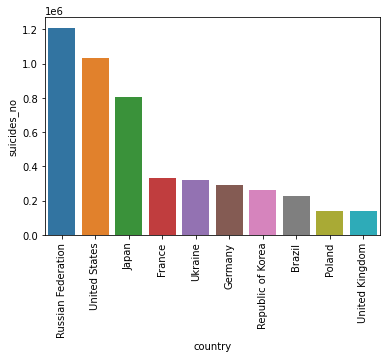

In [27]:
barplot_1 = sns.barplot('country','suicides_no',data = suicides_per_country[:10])
barplot_1.set_xticklabels(suicides_per_country['country'][:10], rotation=90)

Observation:-

1. Most number of suicides occur in Russian Federation followed by United States

In [28]:
suicides_per_country = df.groupby('country').sum('suicides_pop').reset_index().sort_values('suicides_pop',ascending = False)
suicides_per_country = suicides_per_country[['country','suicides_pop']]
suicides_per_country.head()

,country,suicides_pop
75,Russian Federation,11305.13
52,Lithuania,10588.88
40,Hungary,10156.07
47,Kazakhstan,9519.52
73,Republic of Korea,9350.45


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


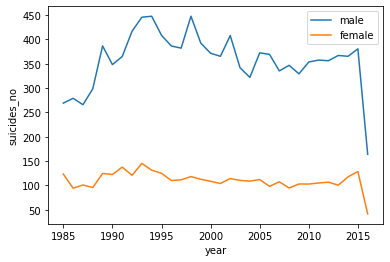

In [29]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

In [30]:
suicides_per_gen = df.groupby('generation').sum('suicides_no').reset_index().sort_values('suicides_no',ascending = False)
suicides_per_gen = suicides_per_gen[['generation','suicides_no']]
suicides_per_gen.head()

,generation,suicides_no
0,Boomers,2284498
5,Silent,1781744
2,Generation X,1532804
4,Millenials,623459
1,G.I. Generation,510009


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Boomers'),
 Text(1, 0, 'Silent'),
 Text(2, 0, 'Generation X'),
 Text(3, 0, 'Millenials'),
 Text(4, 0, 'G.I. Generation'),
 Text(5, 0, 'Generation Z')]

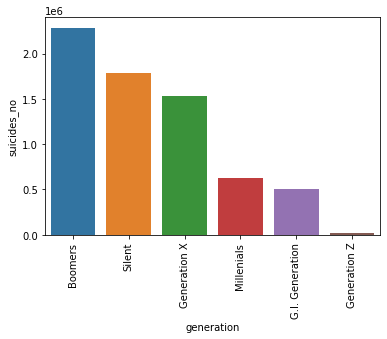

In [31]:
barplot_2 = sns.barplot('generation','suicides_no',data = suicides_per_gen[:10])
barplot_2.set_xticklabels(suicides_per_gen['generation'][:10], rotation=90)

Observation:-

Boomers have the highest suicide number, followed by silent generation and generation x and millenials

In [32]:
df_year = df.groupby('year').sum('suicides_no').reset_index()
df_year = df_year[['year','suicides_no']]
df_year = df_year[df_year['year']<2015]

df_men = df_men.groupby('year').sum('suicides_no').reset_index()
df_men = df_men[['year','suicides_no']]
df_men = df_men[df_men['year']<2015]

df_women = df_women.groupby('year').sum('suicides_no').reset_index()
df_women = df_women[['year','suicides_no']]
df_women = df_women[df_women['year']<2015]

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


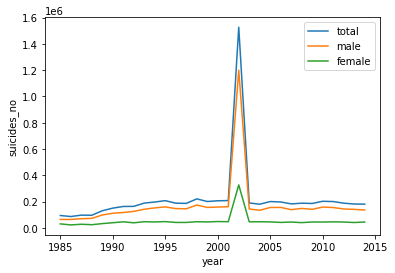

In [33]:
sns.lineplot('year','suicides_no',data=df_year,ci = None)
sns.lineplot('year','suicides_no',data=df_men,ci = None)
sns.lineplot('year','suicides_no',data=df_women,ci = None)
plt.legend(['total','male', 'female'])
plt.show()

Observation :-

1. Men commit more suicides than women do across the world.

2. This shows poor mental condition of men in every successive younger generation.

3. Suicide number for women is a horizontal line showing that their is no significant increase in suicides

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HDI_for_year    27820 non-null  float64
 1   gdp_for_year    27820 non-null  object 
 2   gdp_per_capita  27820 non-null  float64
 3   generation      27820 non-null  object 
 4   country         27820 non-null  object 
 5   year            27820 non-null  float64
 6   sex             27820 non-null  object 
 7   age             27820 non-null  object 
 8   suicides_no     27820 non-null  int64  
 9   population      27820 non-null  object 
 10  suicides_pop    27820 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 2.5+ MB


In [35]:
df['year'] = df['year'].astype('float64')
df['population'] = df['population'].astype('float64')


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


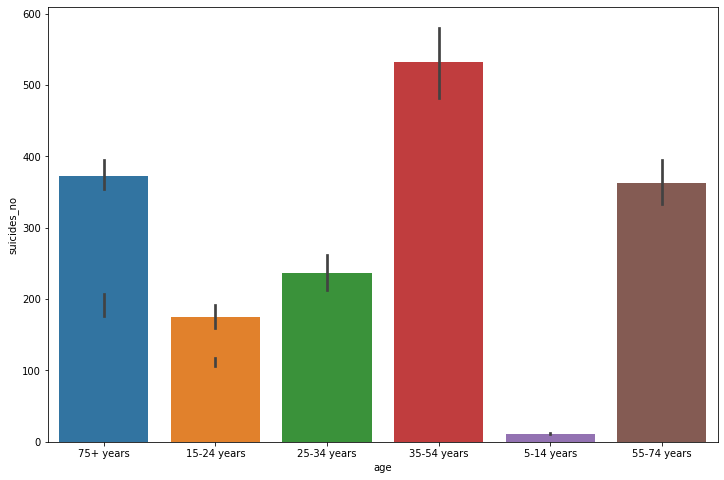

In [36]:
plt.figure(figsize=(12, 8))

sns.barplot('sex', 'suicides_no', data=df);
sns.barplot('age', 'suicides_no', data=df);

In [37]:
# defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['HDI_for_year', 'gdp_per_capita', 'year', 'suicides_no', 'population', 'suicides_pop']

We have 5 categorical features : ['gdp_for_year', 'generation', 'country', 'sex', 'age']


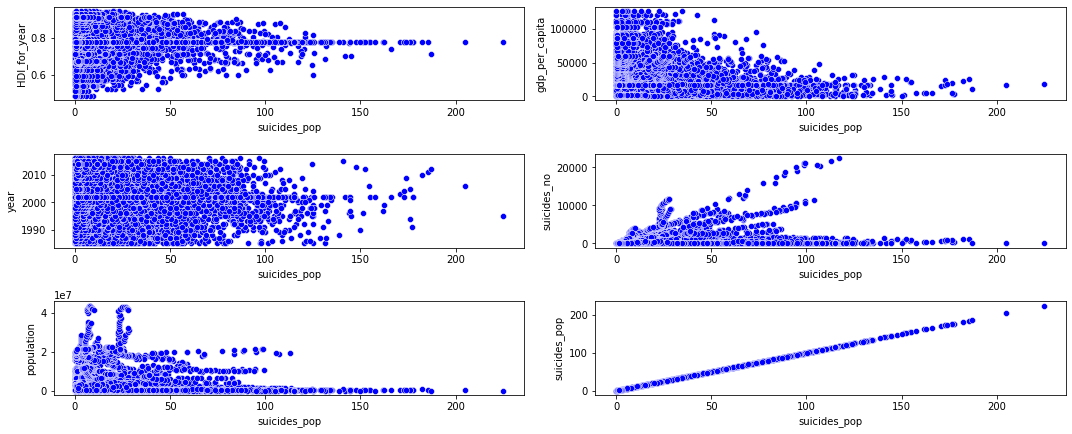

In [38]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(numeric_features)):
    ax = plt.subplot(10, 2, i+1)

    sns.scatterplot(data= df ,x='suicides_pop', y=numeric_features[i], color='b')
  
    plt.tight_layout()

In [39]:
df['easy_gdp_cal'] = round(df['gdp_per_capita']/(len(df['age'].unique() * 2)))

<AxesSubplot:xlabel='suicides_pop', ylabel='easy_gdp_cal'>

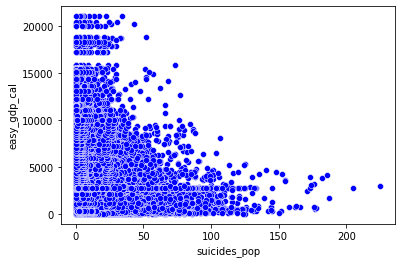

In [40]:
sns.scatterplot(data= df ,x='suicides_pop', y='easy_gdp_cal', color='b')

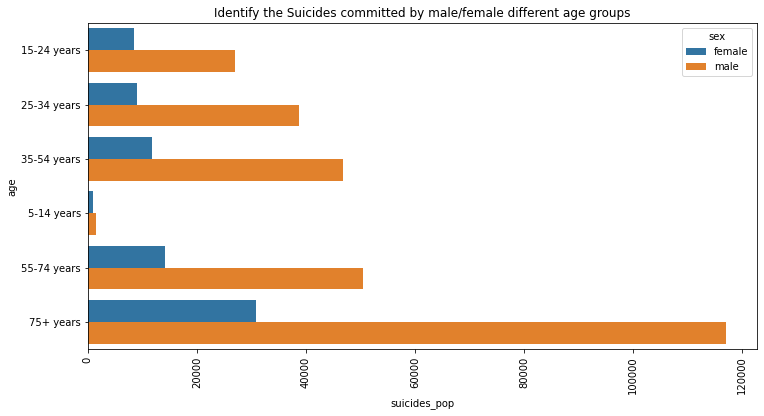

In [41]:
plt.figure(figsize=(12, 6));
Age_Country = pd.DataFrame(df.groupby(['age','sex'],sort=True)['suicides_pop'].sum()).reset_index()
plot1 = Age_Country.sort_values(by=['suicides_pop','age'], ascending=False)
plot1.reset_index()
g = sns.barplot(x='suicides_pop', y='age', data=Age_Country, hue = 'sex');
plt.xticks(rotation=90)

plt.title('Identify the Suicides committed by male/female different age groups');

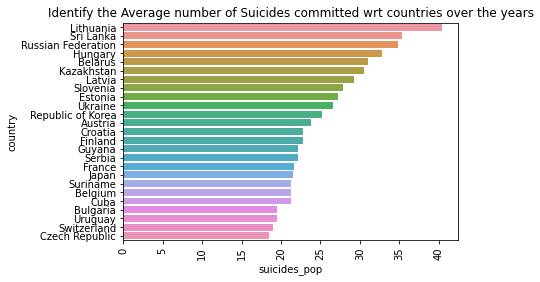

In [42]:
suicide_ctry = pd.DataFrame(df.groupby(['country'])['suicides_pop'].mean()).reset_index()
plot2 = suicide_ctry.sort_values(by=['suicides_pop','country'], ascending=False).head(25)
plot2.reset_index()
g = sns.barplot(x='suicides_pop', y='country', data=plot2);
plt.xticks(rotation=90)
plt.title('Identify the Average number of Suicides committed wrt countries over the years');

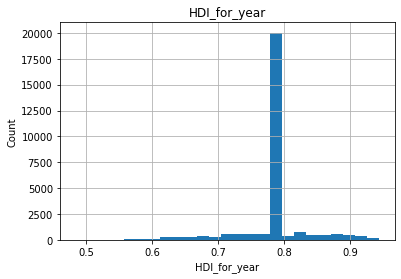

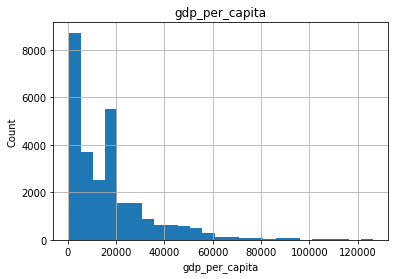

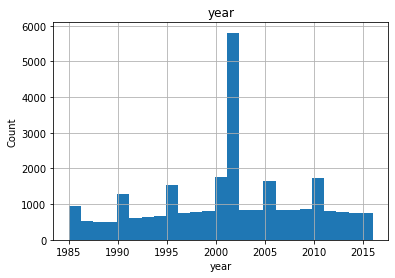

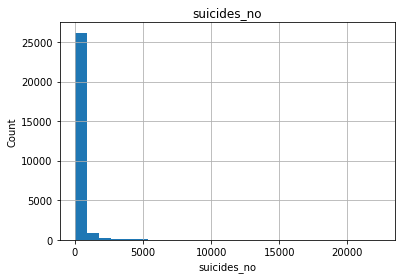

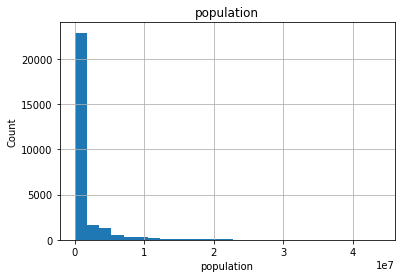

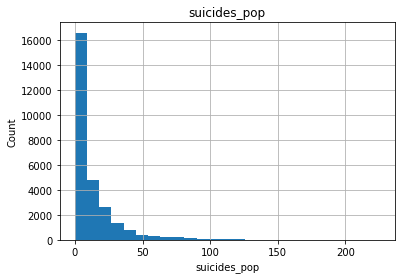

In [43]:
#check the distribution of numerical features in dataset
for feature in numeric_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [44]:
df.columns

Index(['HDI_for_year', 'gdp_for_year', 'gdp_per_capita', 'generation',
       'country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'easy_gdp_cal'],
      dtype='object')

In [45]:
df=df.drop('easy_gdp_cal',axis=1)

<AxesSubplot:xlabel='sex', ylabel='count'>

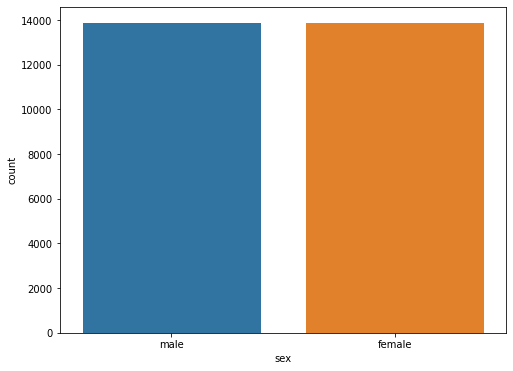

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')
sns.countplot(x='sex',data=df,ax=ax)

In [47]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

df['generation']= label_encoder.fit_transform(df['generation'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['age']= label_encoder.fit_transform(df['age'])
df['country']= label_encoder.fit_transform(df['country'])


In [48]:
df=df.drop('gdp_for_year',axis=1)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


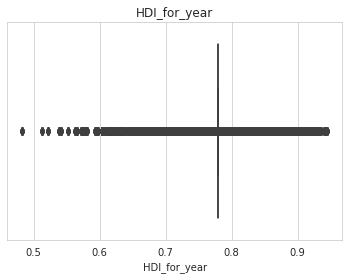

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


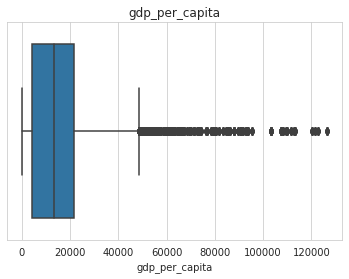

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


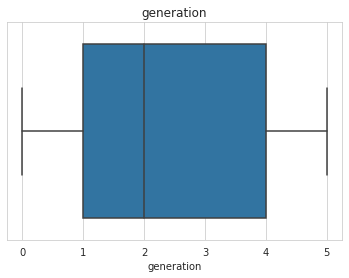

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


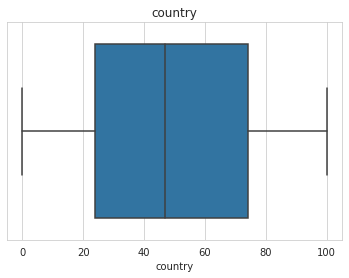

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


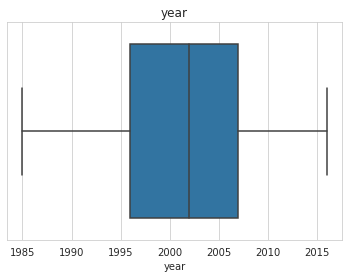

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


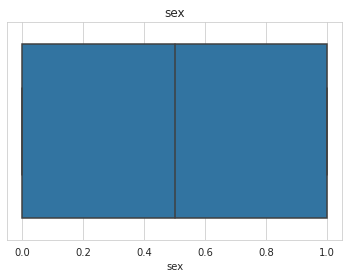

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


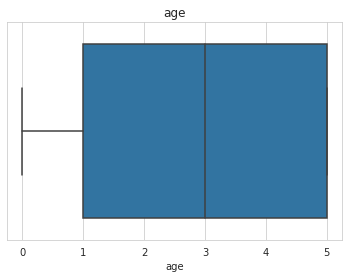

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


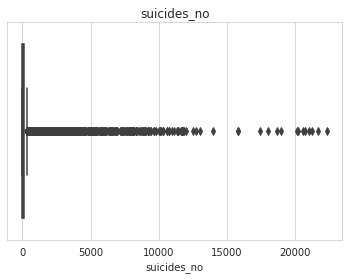

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


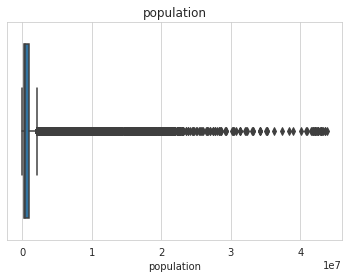

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


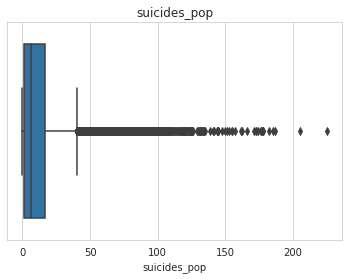

In [49]:
# Boxplots of each feature
for feature in df.columns:
  sns.boxplot(df[feature])
  plt.title(feature)
  plt.show()

In [50]:

# Identify the columns with potential outliers
outlier_cols = ['HDI_for_year','gdp_per_capita','suicides_no', 'population',
       'suicides_pop']

# Replace outliers with the upper and lower bounds
for col in outlier_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


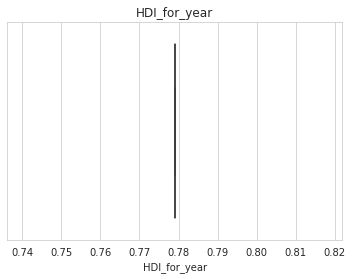

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


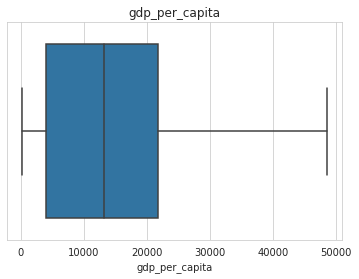

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


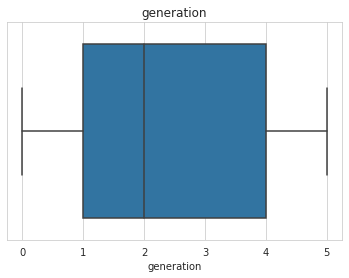

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


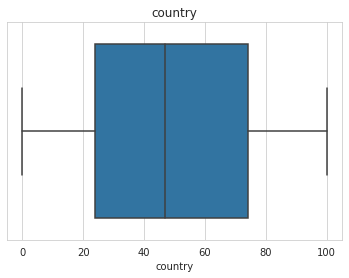

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


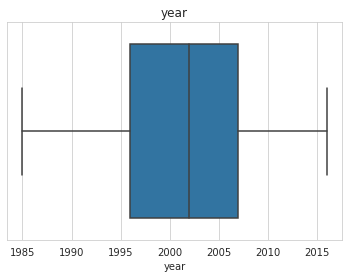

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


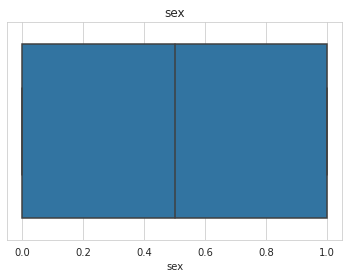

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


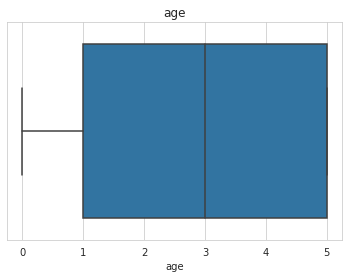

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


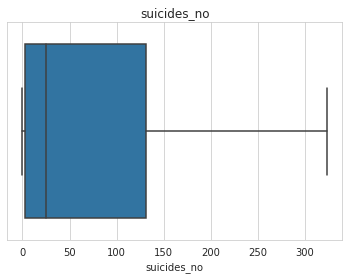

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


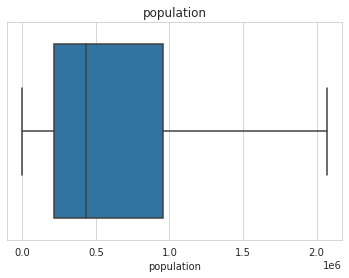

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


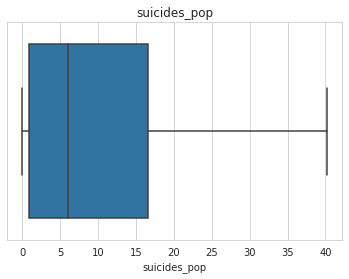

In [51]:
# Boxplots of each feature
for feature in df.columns:
  sns.boxplot(df[feature])
  plt.title(feature)
  plt.show()#

In [52]:
df=df.drop(['generation','HDI_for_year'],axis=1)

In [53]:
df.corr()

,gdp_per_capita,country,year,sex,age,suicides_no,population,suicides_pop
gdp_per_capita,1.000000,2.829873e-02,0.280867,2.379287e-03,0.006442,0.106436,0.067883,0.059324
country,0.028299,1.000000e+00,0.027315,-5.463705e-15,-0.001360,0.087770,0.099828,0.070349
year,0.280867,2.731477e-02,1.000000,3.923957e-03,0.002491,-0.011678,0.003687,-0.032465
sex,0.002379,-5.463705e-15,0.003924,1.000000e+00,-0.003123,0.223701,-0.013122,0.449557
age,0.006442,-1.359938e-03,0.002491,-3.122572e-03,1.000000,-0.047598,-0.098623,0.121441
suicides_no,0.106436,8.776982e-02,-0.011678,2.237014e-01,-0.047598,1.000000,0.603846,0.508711
population,0.067883,9.982803e-02,0.003687,-1.312210e-02,-0.098623,0.603846,1.000000,0.038513
suicides_pop,0.059324,7.034915e-02,-0.032465,4.495571e-01,0.121441,0.508711,0.038513,1.000000


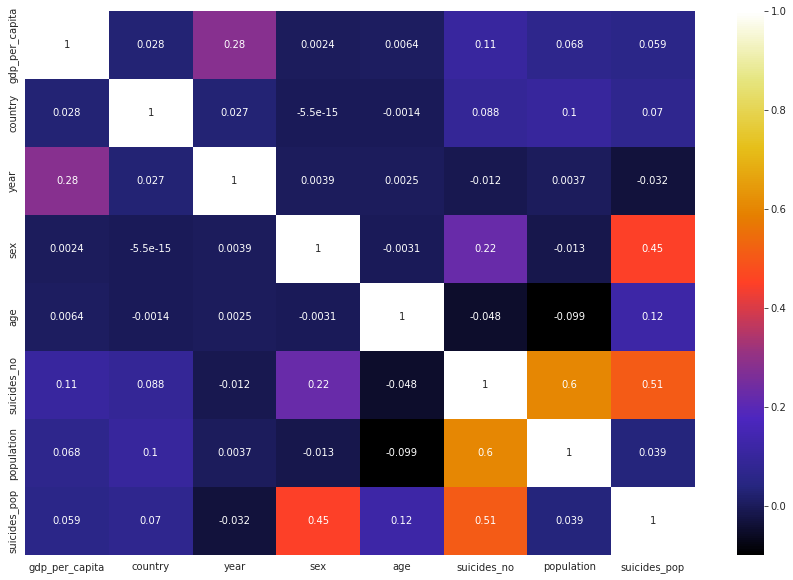

In [54]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [69]:
from sklearn.preprocessing import StandardScaler

columns = [ 'gdp_per_capita''country', 'year', 'sex', 'age', 'suicides_no', 'population',
           'suicides_pop']

scaler = StandardScaler()

#defining dependent and independent variable as y and x
X = df.drop('suicides_no',axis=1).values
y = df['suicides_no'].values

# Fit the scaler to the data
scaler.fit(X)

# Standardize the data using the scaler
X_scaled = scaler.transform(X)


In [70]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def mean_squared_error(self, y):
        return np.mean((y - np.mean(y)) ** 2)

    def split_data(self, X, y, feature_idx, threshold):
        left_mask = X[:, feature_idx] <= threshold
        right_mask = X[:, feature_idx] > threshold
        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[right_mask], y[right_mask]
        return X_left, y_left, X_right, y_right

    def find_best_split(self, X, y):
        best_feature_idx, best_threshold, best_mse = None, None, np.inf
        for feature_idx in range(X.shape[1]):
            for threshold in np.unique(X[:, feature_idx]):
                X_left, y_left, X_right, y_right = self.split_data(X, y, feature_idx, threshold)
                if len(y_left) < self.min_samples_split or len(y_right) < self.min_samples_split:
                    continue
                mse_left, mse_right = self.mean_squared_error(y_left), self.mean_squared_error(y_right)
                mse = mse_left + mse_right
                if mse < best_mse:
                    best_feature_idx, best_threshold, best_mse = feature_idx, threshold, mse
        return best_feature_idx, best_threshold, best_mse

    def build_tree(self, X, y, depth):
        if depth == self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)
        feature_idx, threshold, mse = self.find_best_split(X, y)
        if mse == np.inf:
            return np.mean(y)
        X_left, y_left, X_right, y_right = self.split_data(X, y, feature_idx, threshold)
        left_node = self.build_tree(X_left, y_left, depth + 1)
        right_node = self.build_tree(X_right, y_right, depth + 1)
        return {"feature_idx": feature_idx, "threshold": threshold, "left_node": left_node, "right_node": right_node}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, 0)
    def set_params(self, **params):
      '''function is used to set the values of the attributes of a decision tree object. The function takes a variable 
      number of keyword arguments (**params), 
      which are pairs of attribute names and their corresponding values that should be set for the decision tree object'''
      for param, value in params.items():
        setattr(self, param, value)
        return self

    def predict(self, X):
        def predict_row(row, node):
            if isinstance(node, float):
                return node
            if row[node["feature_idx"]] <= node["threshold"]:
                return predict_row(row, node["left_node"])
            else:
                return predict_row(row, node["right_node"])
        return np.array([predict_row(row, self.tree) for row in X])
    def mean_squared_errorr(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse = sum(squared_differences) / len(squared_differences)
      
      return mse

In [71]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [72]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

In [73]:
import numpy as np

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
      
       
        self.trees = []

    def fit(self, X, y):
     
          for i in range(self.n_estimators):
            
                indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
                X_subset = X[indices]
                y_subset = y[indices]
                tree = DecisionTreeRegressor(max_depth=self.max_depth, 
                                              min_samples_split=self.min_samples_split
                                             
                                              )
                tree.fit(X_subset, y_subset)
                self.trees.append(tree)
    def predict(self, X):
        y_preds = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            y_preds[:, i] = tree.predict(X)
        return np.mean(y_preds, axis=1)            
    def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse = sum(squared_differences) / len(squared_differences)
      
      return mse
    
    
  


In [74]:
regressor = RandomForestRegressor(n_estimators=10, max_depth=4, min_samples_split=2)
regressor.fit(X_train,y_train)



In [75]:
y_pred = regressor.predict(X_test)

In [76]:
y_pred

array([10.85893406, 10.85893406, 10.85893406, ..., 10.85893406,
       10.85893406, 10.85893406])

In [77]:
import numpy as np
def mean_squared_error(y_true, y_pred):
    """
    Calculates the mean squared error between y_true and y_pred.
    :param y_true: A list or array of true values
    :param y_pred: A list or array of predicted values
    :return: The mean squared error between y_true and y_pred
    """
    # Get the length of the arrays
    n = len(y_true)
    
    # Calculate the sum of squared differences
    sum_squared_diff = sum((y_true[i] - y_pred[i])**2 for i in range(n))
    
    # Calculate the mean squared error
    mse = sum_squared_diff / n
    
    return mse



In [78]:
mse = mean_squared_error(y_test, y_pred)
mse

156.89480468453655

In [79]:
from sklearn.metrics import r2_score

test_set_r2 = r2_score(y_test, y_pred)

print(test_set_r2)

-0.0001900160052630273


In [80]:
# writing  function for r2_score (R2 = 1 - (SSres / SStot)) 
def r2(self,y_true, y_pred):
  # Calculate the mean of the true values
  y_true_mean = sum(y_true) / len(y_true)
  # Calculate the total sum of squares (TSS)
  tss = sum((y_true - y_true_mean) ** 2)
  # Calculate the residual sum of squares (RSS)
  rss = sum((y_true - y_pred) ** 2)
  # Calculate the R-squared value
  r2_score = 1 - (rss / tss)
  return r2_score

In [81]:
r2_score = r2_score(y_test, y_pred)
r2_score

-0.0001900160052630273